# Statistická analýza, příprava dat

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.
!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m 	= počet řádků = 100
- x’s = vstupní proměnná / features
- y’s = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

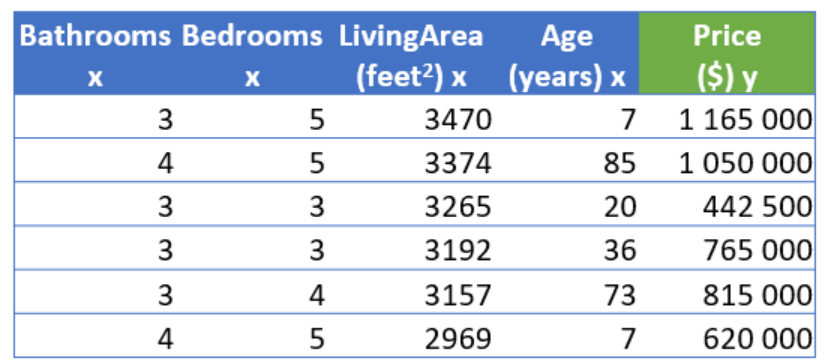

# Úkol
- Vytvořte regresní lineání model z parametrů, které jste vybrali minulé cvičení
- Data před zpracováním standardizujte
- Model vytvořte ručně
- Model vytvořte pomocí scikit-learn

# Načtení dat

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [37]:
data = pd.read_csv ("../dataset/portland_filtered.csv",  sep=';')

# Lineání model bez pomocí knihoven
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

In [38]:
X = pd.DataFrame(np.c_[data['age']], columns = ['age'])
Y = data['price']

In [44]:
X.describe()


,age
count,100.00000
mean,49.88000
std,32.77973
min,3.00000
25%,20.00000
50%,47.50000
75%,75.25000
max,114.00000


In [45]:
Y.describe()

count    1.000000e+02
mean     5.196074e+05
std      1.722241e+05
min      1.650000e+05
25%      4.125000e+05
50%      5.000000e+05
75%      5.995312e+05
max      1.165000e+06
Name: price, dtype: float64

In [46]:
def split_dataset (X, Y, train_ratio = 0.75, validation_ratio = 0.15, test_ratio = 0.10):
    
    assert(train_ratio + validation_ratio + test_ratio == 1.0)

    # train nyní tvoří 75 % celého souboru dat
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

    # test je nyní 10 % původního souboru dat
    # nyní představuje 15 % původního souboru dat
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [47]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = split_dataset(X, Y)
print (X_train.shape, Y_train.shape)
print (X_val.shape, Y_val.shape)
print (X_test.shape, Y_test.shape)

(75, 1) (75,)
(15, 1) (15,)
(10, 1) (10,)


In [73]:
def initialize(dim):
    
    bias=random.random()
    weights=np.random.rand(dim)
    return bias, weights

In [74]:
def print_model_params(bias, weights):
    
    print ("Model parameters\n================")
    print(f"Bias: {bias}")
    print (f"Weights: {weights}")  

In [75]:
bias, weights=initialize(X.shape[1])
print_model_params(bias, weights)

Model parameters
Bias: 0.4929145369384835
Weights: [0.12016465]


In [76]:
def predict(X, bias, weights):
    return bias + np.dot(X, weights)

In [81]:
print ("Predicted values\n================")
Y_predicted = predict(X_train, bias, weights)
Y_predicted[0:4]

Predicted values


array([6.50114693, 1.09373778, 5.78015904, 6.50114693])

In [82]:
def visualize_model_2d (X, Y, Y_predicted):
    """ Visualization of simple linear model in 2D
        X - real input data
        Y - real output data
        Y_predicted - predicted output data
    """
    plt.figure() 
    plt.plot (X, Y_predicted, c='b', label = "Train prediction")
    plt.scatter (X, Y, marker = 'x', c='r', label="Train actual")
    plt.title ("Model")
    plt.ylabel("$")
    plt.xlabel("RM")
    plt.legend()
    plt.show()

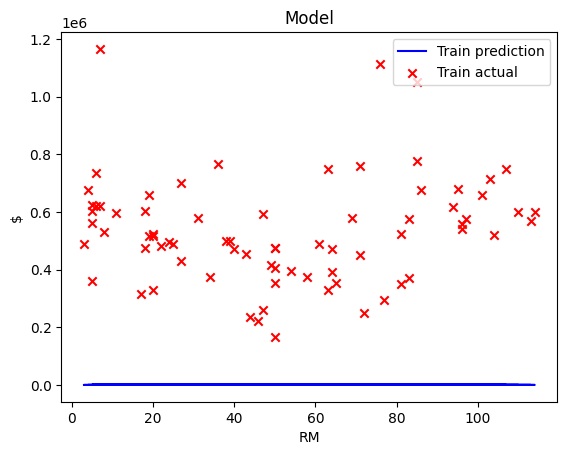

In [83]:
visualize_model_2d(X_train, Y_train, Y_predicted)

In [55]:
def get_cost(Y, Y_predicted):
    Y_resd = Y - Y_predicted
    return np.sum(np.dot(Y_resd.T,Y_resd))/(len(Y-Y_resd)*2)

In [56]:
def print_cost (Y_train, Y_predicted):
    print (f"Cost function MSE: {get_cost(Y_train, Y_predicted)}")

In [58]:
print_cost(Y_train, Y_predicted)

Cost function MSE: 159386817400.2604


In [59]:
def print_model_score(Y_train, Y_predicted):
    """ Printing model score
    """
    r2 = r2_score(Y_train, Y_predicted)
    rmse = (np.sqrt(mean_squared_error(Y_train, Y_predicted)))    
    print('R2 score: {}'.format(r2))    
    print('RMSE: {}'.format(rmse))

In [60]:
print_model_score (Y_train, Y_predicted)

R2 score: -8.509508177619649
RMSE: 564600.4204749769


In [61]:
def update_weights(X, Y, Y_predicted, bias_0, weights_0, learning_rate):

    # výpočet parciálních derivací
    delta_bias = (np.sum(Y_predicted - Y))/len(Y)
    delta_weights = (np.dot((Y_predicted - Y),X))/len(Y)

    # výpočet úpravy parametrů modelu
    bias_1 = bias_0 - learning_rate * delta_bias
    weights_1 = weights_0 - learning_rate * delta_weights
    return bias_1, weights_1

In [62]:
Y_predicted = predict(X_train, bias, weights)
bias, weights = update_weights(X_train, Y_train, Y_predicted, bias, weights, 0.01)
print_model_params(bias, weights)

Model parameters
Bias: 5341.822898878726
Weights: [278098.60595415]


In [63]:
Y_predicted = predict(X_train, bias, weights)
print_cost(Y_train, Y_predicted)

Cost function MSE: 135397523496386.98


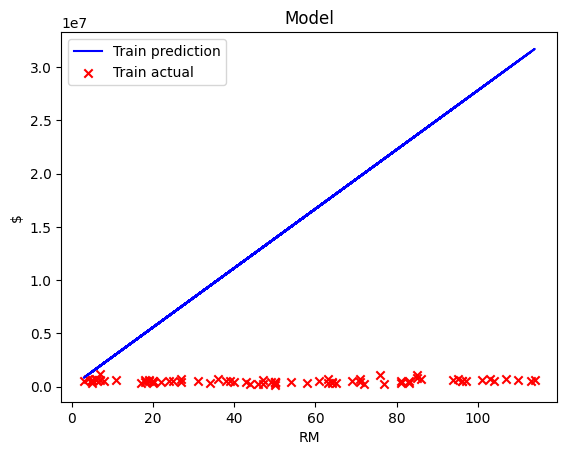

In [64]:
visualize_model_2d(X_train, Y_train, Y_predicted)

In [65]:
print_model_score (Y_train, Y_predicted)

R2 score: -8077.233055403472
RMSE: 16455851.451467771


In [66]:
def run_gradient_descent(X, Y, learning_rate, num_iterations):
    # inicializace parametrů modelu
    bias, weights=initialize(X.shape[1])
    iter_num=0

    # ukladání postupu učení do dataFrame
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    
    for each_iter in range(num_iterations):
        # kontrolní zobrazení skóre
        Y_predicted = predict(X, bias, weights)
        this_cost=get_cost(Y, Y_predicted)

        # vylepšení parametrů
        prev_bias=bias
        prev_weights=weights
        bias, weights = update_weights(X, Y, Y_predicted, prev_bias, prev_weights, learning_rate)

        # uložení každé 10. iterace do historie učen
        if(iter_num % 10==0):
            gd_iterations_df.loc[result_idx]=[iter_num, this_cost]
            result_idx=result_idx+1

        iter_num +=1    
    return gd_iterations_df, bias, weights

In [67]:
# Naučení modelu
gd_iterations_df, bias, weights=run_gradient_descent(X_train, Y_train, learning_rate=0.001, num_iterations=200)

In [68]:
# Vypsání modelu
print_model_params(bias, weights)
Y_predicted=predict(X_train, bias, weights)
print_cost(Y_train, Y_predicted)
print_model_score (Y_train, Y_predicted)

Model parameters
Bias: -1.4632931858391268e+88
Weights: [-1.0577161e+90]
Cost function MSE: 2.0679378283211957e+183
R2 score: -1.2337953671441651e+173
RMSE: 6.4310774032368716e+91


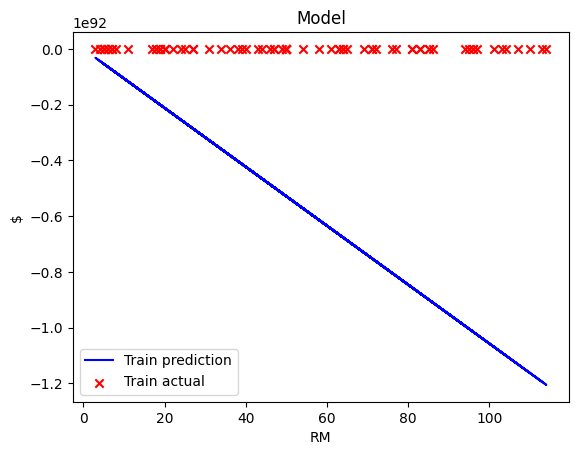

In [69]:
visualize_model_2d(X_train, Y_train, Y_predicted)

In [70]:
Y_val_predicted = predict(X_val, bias, weights)
print_cost(Y_val, Y_val_predicted)
print_model_score(Y_val, Y_val_predicted)

Cost function MSE: 1.7916697257609113e+183
R2 score: -3.167193000626983e+173
RMSE: 5.98610010902075e+91


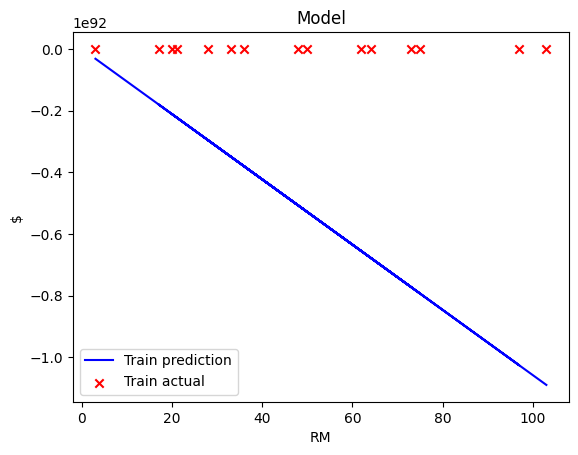

In [71]:
visualize_model_2d(X_val, Y_val, Y_val_predicted)

Text(0, 0.5, 'Cost or MSE')

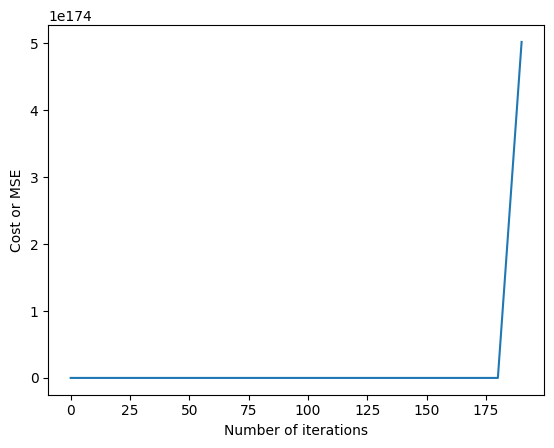

In [72]:
# zobrazení, jak s počtem iterací klesá hodnota nákladové funkce
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

# Linearní modelu pomocí scikit-learn
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

In [28]:
lin_model = LinearRegression()

In [29]:
lin_model.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [80, 75]

In [30]:
print ("Bias: ", lin_model.intercept_)
print("Weights: ", lin_model.coef_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [31]:
Y_predicted = lin_model.predict(X_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [32]:
print_model_score(Y_train, Y_predicted)

NameError: name 'print_model_score' is not defined

In [33]:
visualize_model_3D(X1, X2, Y_train, lin_model.intercept_, lin_model.coef_, 40)

NameError: name 'visualize_model_3D' is not defined

In [34]:
Y_val_predict = lin_model.predict(X_val)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
print_model_score(Y_val, Y_val_predict)

NameError: name 'print_model_score' is not defined